# 1 Data preprocessing - stage 1

<b> Purpose of the action </b> - create features from the available data to help predict the results of matches

## 1.1 Data loading

### 1.1.1 Import nessesary libraries and package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from functools import reduce
# module data_preprocessing contains functions which will be used in data preprocessing
from data_preprocessing import *

### 1.1.2 Create path to directory where there are located train datasets

In [2]:
train_dir = os.path.join(os.getcwd(),'train_datasets')
train_dir

'C:\\Users\\48509\\Desktop\\Project-Bootcamp\\train_datasets'

### 1.1.3 Define useful columns

From data sets import only few most usesul columns (more info about data in attached file 'Notes about data.txt'):
- Date = Match Date (dd/mm/yy)
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG = Full Time Home Team Goals
- FTAG = Full Time Away Team Goals
- FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win) - <b> target column </b>
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HC = Home Team Corners
- AC = Away Team Corners

In [3]:
# define columns to import
usecols=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS', 'AS', 'HST', 'AST', 'HC', 'AC']
datacols=['Date']

### 1.1.4 Read the data

All preprocessing functions are from module data_preprocessing.py

In [4]:
# read seasons from 2000-2001 to 2018-2019 and put them all on one list
train_datasets = read_datasets(train_dir, usecols, datacols)
train_datasets[0].head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC
0,2000-08-19,Charlton,Man City,4,0,H,17,8,14,4,6,6
1,2000-08-19,Chelsea,West Ham,4,2,H,17,12,10,5,7,7
2,2000-08-19,Coventry,Middlesbrough,1,3,A,6,16,3,9,8,4
3,2000-08-19,Derby,Southampton,2,2,D,6,13,4,6,5,8
4,2000-08-19,Leeds,Everton,2,0,H,17,12,8,6,6,4


In [5]:
# as test_set will be use part of season 2019-2020 - first 24 rounds
test_dataset = pd.read_csv('./test_dataset/2019-2020.csv', parse_dates=datacols,
                                usecols=usecols)
test_dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC
0,2019-09-08,Liverpool,Norwich,4,1,H,15,12,7,5,11,2
1,2019-10-08,West Ham,Man City,0,5,A,5,14,3,9,1,1
2,2019-10-08,Bournemouth,Sheffield United,1,1,D,13,8,3,3,3,4
3,2019-10-08,Burnley,Southampton,3,0,H,10,11,4,3,2,7
4,2019-10-08,Crystal Palace,Everton,0,0,D,6,10,2,3,6,2


## 1.2 Creating features

### 1.2.1 Add multiple statistics to dataframes:
- cumulative goals scored by home and away teams
- cumulative goals lost by home and away teams
- cumulative shoots made by home and away teams
- cumulative shoots on target made by home and away teams
- cumulative number of home and away teams corners 

Expect: the higher the statistics(except goals lost), the higher the higher the probability of the next win

In [6]:
train_datasets = [get_multiple_statistics(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamGoalsScored,AwayTeamGoalsScored,HomeTeamGoalsLost,AwayTeamGoalsLost,HomeTeamShootsMade,AwayTeamShootsMade,HomeTeamTargetShootsMade,AwayTeamTargetShootsMade,HomeTeamCorners,AwayTeamCorners
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,6,3,5,8,43,38,25,18,26,18
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,10,8,11,6,50,67,34,26,35,28
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,9,14,8,3,60,78,38,39,30,27
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,6,5,5,8,61,64,31,26,35,22
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,7,7,9,4,59,56,25,26,41,27


In English Premier League each season contain 20 teams, 38 rounds and each round contain 10 matches

In [7]:
# define number of rounds for incomplete season (default is 38)
test_dataset = get_multiple_statistics(test_dataset, rounds=24)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamGoalsScored,AwayTeamGoalsScored,HomeTeamGoalsLost,AwayTeamGoalsLost,HomeTeamShootsMade,AwayTeamShootsMade,HomeTeamTargetShootsMade,AwayTeamTargetShootsMade,HomeTeamCorners,AwayTeamCorners
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,5,8,6,9,58,56,19,22,25,24
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,6,11,4,6,59,77,14,25,34,32
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,6,9,7,12,55,48,16,24,24,15
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,5,5,7,6,63,56,17,15,26,35
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,16,4,6,10,103,86,38,18,43,32


### 1.2.2 Add aggregate total points

Expect: the higher the total points, the higher the higher the probability of the next win

In [8]:
train_datasets = [get_aggregate_points(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamGoalsLost,AwayTeamGoalsLost,HomeTeamShootsMade,AwayTeamShootsMade,HomeTeamTargetShootsMade,AwayTeamTargetShootsMade,HomeTeamCorners,AwayTeamCorners,HomeTeamTotalPoints,AwayTeamTotalPoints
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,5,8,43,38,25,18,26,18,8,5
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,11,6,50,67,34,26,35,28,5,10
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,8,3,60,78,38,39,30,27,7,11
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,5,8,61,64,31,26,35,22,7,4
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,9,4,59,56,25,26,41,27,3,10


In [9]:
test_dataset = get_aggregate_points(test_dataset, rounds=24)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamGoalsLost,AwayTeamGoalsLost,HomeTeamShootsMade,AwayTeamShootsMade,HomeTeamTargetShootsMade,AwayTeamTargetShootsMade,HomeTeamCorners,AwayTeamCorners,HomeTeamTotalPoints,AwayTeamTotalPoints
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,6,9,58,56,19,22,25,24,7,7
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,4,6,59,77,14,25,34,32,8,8
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,7,12,55,48,16,24,24,15,5,6
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,7,6,63,56,17,15,26,35,7,5
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,6,10,103,86,38,18,43,32,10,2


### 1.2.3 Add total points from last 1, 3, 5, 10 matches

Expect: the higher the total points from last matches, the higher the higher the probability of the next win

In [10]:
train_datasets = [add_points_from_last_matches(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamTotalPoints,AwayTeamTotalPoints,HomeTeamPointsFromLast1Matches,AwayTeamPointsFromLast1Matches,HomeTeamPointsFromLast3Matches,AwayTeamPointsFromLast3Matches,HomeTeamPointsFromLast5Matches,AwayTeamPointsFromLast5Matches,HomeTeamPointsFromLast10Matches,AwayTeamPointsFromLast10Matches
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,8,5,3,1,6,2,8,5,8,5
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,5,10,1,3,2,6,5,10,5,10
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,7,11,3,3,4,7,7,11,7,11
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,7,4,0,0,1,3,7,4,7,4
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,3,10,0,1,2,7,3,10,3,10


In [11]:
test_dataset = add_points_from_last_matches(test_dataset,rounds=24)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamTotalPoints,AwayTeamTotalPoints,HomeTeamPointsFromLast1Matches,AwayTeamPointsFromLast1Matches,HomeTeamPointsFromLast3Matches,AwayTeamPointsFromLast3Matches,HomeTeamPointsFromLast5Matches,AwayTeamPointsFromLast5Matches,HomeTeamPointsFromLast10Matches,AwayTeamPointsFromLast10Matches
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,7,7,3,3,7,3,7,7,7,7
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,8,8,0,3,6,4,8,8,8,8
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,5,6,1,3,2,3,5,6,5,6
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,7,5,0,0,3,1,7,5,7,5
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,10,2,0,1,6,2,10,2,10,2


### 1.2.4 Add results from last 1, 2, 3, 4, 5 matches

Expect: each win from previous matches(especially win from last match), the higher the probability of the next win

In [12]:
train_datasets = [add_last_matches_results(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamLast1Match,AwayTeamLast1Match,HomeTeamLast2Match,AwayTeamLast2Match,HomeTeamLast3Match,AwayTeamLast3Match,HomeTeamLast4Match,AwayTeamLast4Match,HomeTeamLast5Match,AwayTeamLast5Match
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,W,D,W,L,L,D,D,W,D,L
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,D,W,D,W,L,L,L,D,W,W
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,W,W,L,W,D,D,W,D,L,W
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,L,L,D,L,L,W,W,D,W,L
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,L,D,D,W,D,W,L,W,D,L


In [13]:
test_dataset = add_last_matches_results(test_dataset,rounds=24)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamLast1Match,AwayTeamLast1Match,HomeTeamLast2Match,AwayTeamLast2Match,HomeTeamLast3Match,AwayTeamLast3Match,HomeTeamLast4Match,AwayTeamLast4Match,HomeTeamLast5Match,AwayTeamLast5Match
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,W,W,D,L,W,L,L,W,L,D
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,L,W,W,D,W,L,D,D,D,W
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,D,W,L,L,D,L,L,W,W,L
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,L,L,W,D,L,L,W,W,D,D
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,L,D,W,D,W,L,D,L,W,L


### 1.2.5 Add 3 and 5 win / loss game streaks

Expect: models could find some useful correlation between these features and target value

In [14]:
train_datasets = [get_games_streaks(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AwayTeamFormPtsStr,AwayTeamFormPts,HomeTeamWinStreak3,HomeTeamWinStreak5,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,DLDWL,5,0,0,0,0,0,0,0,0
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,WWLDW,10,0,0,0,0,0,0,0,0
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,WWDDW,11,0,0,0,0,0,0,0,0
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,LLWDL,4,0,0,0,0,0,0,0,0
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,DWWWL,10,0,0,0,0,0,0,0,0


In [15]:
test_dataset = get_games_streaks(test_dataset)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AwayTeamFormPtsStr,AwayTeamFormPts,HomeTeamWinStreak3,HomeTeamWinStreak5,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,WLLWD,7,0,0,0,0,0,0,0,0
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,WDLDW,8,0,0,0,0,0,0,0,0
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,WLLWL,6,0,0,0,0,0,0,0,0
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,LDLWD,5,0,0,0,0,0,0,0,0
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,DDLLL,2,0,0,0,0,0,0,1,0


### 1.2.6 Encode results from last matches
Don't need to have a string representation of this column for future feature generation anymore (columns like HomeTeamLast1Match etc.)

In [16]:
train_datasets = [encode_last_results(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AwayTeamFormPtsStr,AwayTeamFormPts,HomeTeamWinStreak3,HomeTeamWinStreak5,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,DLDWL,5,0,0,0,0,0,0,0,0
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,WWLDW,10,0,0,0,0,0,0,0,0
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,WWDDW,11,0,0,0,0,0,0,0,0
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,LLWDL,4,0,0,0,0,0,0,0,0
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,DWWWL,10,0,0,0,0,0,0,0,0


In [17]:
test_dataset = encode_last_results(test_dataset)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AwayTeamFormPtsStr,AwayTeamFormPts,HomeTeamWinStreak3,HomeTeamWinStreak5,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,WLLWD,7,0,0,0,0,0,0,0,0
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,WDLDW,8,0,0,0,0,0,0,0,0
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,WLLWL,6,0,0,0,0,0,0,0,0
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,LDLWD,5,0,0,0,0,0,0,0,0
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,DDLLL,2,0,0,0,0,0,0,1,0


### 1.2.7 Add previous season position

Expect: the higher the last year position, the higher the probability of the next win

In [18]:
# create helper dataframe with teams places in each year
Standings = pd.read_csv("EPLStandings.txt") # data from https://github.com/RudrakshTuwani/Football-Data-Analysis-and-Prediction
Standings.set_index(['Team'], inplace=True)
Standings = Standings.fillna(18) # for all rookies gives them 18 place (each year 3 teams rise from the lower league)
Standings.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Team,,,,,,,,,,,,,,,,,,,,
Arsenal,2.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,2.0,5.0,6.0,5.0
Aston Villa,6.0,8.0,8.0,16.0,6.0,10.0,16.0,11.0,6.0,6.0,6.0,9.0,16.0,15.0,15.0,17.0,20.0,18.0,18.0,18.0
Birmingham,18.0,18.0,18.0,13.0,10.0,12.0,18.0,18.0,19.0,18.0,9.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Blackburn,18.0,18.0,10.0,6.0,15.0,15.0,6.0,10.0,7.0,15.0,10.0,15.0,19.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Blackpool,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,19.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


In [19]:
# create list contains previous year for each season
last_years = [filename.split('-')[0] for filename in os.listdir(train_dir)]
print(last_years)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [20]:
train_datasets = [get_last_year_position(dataset, Standings, year) for dataset, year in zip(train_datasets, last_years)] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamWinStreak3,HomeTeamWinStreak5,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5,HomeTeamLastYearPosition,AwayTeamLastYearPosition
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,0,0,0,0,0,0,0,0,6.0,17.0
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,0,0,0,0,0,0,0,0,18.0,10.0
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,0,0,0,0,0,0,0,0,13.0,1.0
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,0,0,0,0,0,0,0,0,3.0,18.0
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,0,0,0,0,0,0,0,0,15.0,11.0


In [21]:
test_dataset = get_last_year_position(test_dataset, Standings, '2019', rounds=24)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamWinStreak3,HomeTeamWinStreak5,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5,HomeTeamLastYearPosition,AwayTeamLastYearPosition
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,0,0,0,0,0,0,0,0,16.0,14.0
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,0,0,0,0,0,0,0,0,9.0,4.0
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,0,0,0,0,0,0,0,0,18.0,18.0
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,0,0,0,0,0,0,0,0,8.0,18.0
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,0,0,0,0,0,0,1,0,1.0,11.0


### 1.2.8 Add information about rookie team (which don't play in Premier League in previous season)
Expect: usually the lower probability of the next win for these teams

In [22]:
train_datasets = [is_rookie(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5,HomeTeamLastYearPosition,AwayTeamLastYearPosition,IsHomeTeamRookie,IsAwayTeamRookie
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,0,0,0,0,0,0,6.0,17.0,0,0
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,0,0,0,0,0,0,18.0,10.0,1,0
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,0,0,0,0,0,0,13.0,1.0,0,0
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,0,0,0,0,0,0,3.0,18.0,0,1
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,0,0,0,0,0,0,15.0,11.0,0,0


In [23]:
test_dataset = is_rookie(test_dataset)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HomeTeamLossStreak3,HomeTeamLossStreak5,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5,HomeTeamLastYearPosition,AwayTeamLastYearPosition,IsHomeTeamRookie,IsAwayTeamRookie
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,0,0,0,0,0,0,16.0,14.0,0,0
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,0,0,0,0,0,0,9.0,4.0,0,0
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,0,0,0,0,0,0,18.0,18.0,1,1
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,0,0,0,0,0,0,8.0,18.0,0,1
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,0,0,0,0,1,0,1.0,11.0,0,0


### 1.2.9 Add information whether the team played in the Premier League every season
Expect: the higher probability of the next win for these teams

In [24]:
# create list of teams which always played in Premier League in last 20 seasons
unique_teams = [np.unique(dataset.HomeTeam) for dataset in train_datasets]
regulars = list(reduce(set.intersection, [set(team) for team in unique_teams ]))
regulars

['Everton', 'Tottenham', 'Man United', 'Chelsea', 'Liverpool', 'Arsenal']

In [25]:
train_datasets = [is_regular(dataset, regulars) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5,HomeTeamLastYearPosition,AwayTeamLastYearPosition,IsHomeTeamRookie,IsAwayTeamRookie,IsHomeTeamRegulars,IsAwayTeamRegulars
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,0,0,0,0,6.0,17.0,0,0,0,0
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,0,0,0,0,18.0,10.0,1,0,0,1
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,0,0,0,0,13.0,1.0,0,0,1,1
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,0,0,0,0,3.0,18.0,0,1,0,0
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,0,0,0,0,15.0,11.0,0,0,0,0


In [26]:
test_dataset = is_regular(test_dataset, regulars)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AwayTeamWinStreak3,AwayTeamWinStreak5,AwayTeamLossStreak3,AwayTeamLossStreak5,HomeTeamLastYearPosition,AwayTeamLastYearPosition,IsHomeTeamRookie,IsAwayTeamRookie,IsHomeTeamRegulars,IsAwayTeamRegulars
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,0,0,0,0,16.0,14.0,0,0,0,0
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,0,0,0,0,9.0,4.0,0,0,0,1
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,0,0,0,0,18.0,18.0,1,1,0,0
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,0,0,0,0,8.0,18.0,0,1,1,0
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,0,0,1,0,1.0,11.0,0,0,0,0


### 1.2.10 Add some difference features between statistics:
- goals difference between scored and lost goals by home team
- goals difference between scored and lost goals by away team
- goals difference between difference in scored and lost goals by home and away team
- points difference between home and away team 
- points difference between home and away team in last match
- points difference between home and away team in last 3 matches
- points difference between home and away team in last 5 matches
- points difference between home and away team in last 10 matches
- shoots difference between home and away team
- target shoots difference between home and away team
- corners difference between home and away team
- last year position difference between home and away team

Expect: models could find more useful correlation between these features(than from total statisctics) and target value 

In [27]:
train_datasets = [get_difference(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,TotalGoalsDifference,DifferenceTotalPoints,Difference1MatchPoints,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition
50,2000-09-16,Aston Villa,Bradford,2,0,H,12,8,7,4,...,6,3,2,4,3,3,5,7,8,-11.0
51,2000-09-16,Charlton,Tottenham,1,0,H,9,10,5,5,...,-3,-5,-2,-4,-5,-5,-17,8,7,8.0
52,2000-09-16,Everton,Man United,1,3,A,6,17,4,9,...,-10,-4,0,-3,-4,-4,-18,-1,3,12.0
53,2000-09-16,Leeds,Ipswich,1,2,A,11,12,6,7,...,4,3,0,-2,3,3,-3,5,13,-15.0
54,2000-09-16,Southampton,Newcastle,2,0,H,13,10,9,7,...,-5,-7,-1,-5,-7,-7,3,-1,14,4.0


In [28]:
test_dataset = get_difference(test_dataset)
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,TotalGoalsDifference,DifferenceTotalPoints,Difference1MatchPoints,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition
50,2019-09-20,Southampton,Bournemouth,1,3,A,25,6,6,3,...,0,0,0,4,0,0,2,-3,1,2.0
51,2019-09-21,Leicester,Tottenham,2,1,H,16,11,7,4,...,-3,0,-3,2,0,0,-18,-11,2,5.0
52,2019-09-21,Burnley,Norwich,2,0,H,13,11,6,2,...,2,-1,-2,-1,-1,-1,7,-8,9,0.0
53,2019-09-21,Everton,Sheffield United,0,2,A,16,2,3,1,...,-1,2,0,2,2,2,7,2,-9,-10.0
54,2019-09-21,Man City,Watford,8,0,H,28,5,11,4,...,16,8,-1,4,8,8,17,20,11,-10.0


### 1.2.11 Change string target labels to binary labels

Change problem to binary classifiaction - I noticed that any model never predict a draw between teams 
<br> 1 - HomeTeam win </br>
<br> 0 - AwayTeam win or draw </br>

In [29]:
# FTR is target column
train_datasets = [binary_labels(dataset, target='FTR') for dataset in train_datasets] 
train_datasets[0].head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,TotalGoalsDifference,DifferenceTotalPoints,Difference1MatchPoints,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition
0,2000-08-19,Charlton,Man City,4,0,1,17,8,14,4,...,0,0,0,0,0,0,0,0,0,0.0
1,2000-08-19,Chelsea,West Ham,4,2,1,17,12,10,5,...,0,0,0,0,0,0,0,0,0,-4.0
2,2000-08-19,Coventry,Middlesbrough,1,3,0,6,16,3,9,...,0,0,0,0,0,0,0,0,0,2.0
3,2000-08-19,Derby,Southampton,2,2,0,6,13,4,6,...,0,0,0,0,0,0,0,0,0,1.0
4,2000-08-19,Leeds,Everton,2,0,1,17,12,8,6,...,0,0,0,0,0,0,0,0,0,-10.0


In [30]:
test_dataset = binary_labels(test_dataset, target='FTR')
test_dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,TotalGoalsDifference,DifferenceTotalPoints,Difference1MatchPoints,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition
0,2019-09-08,Liverpool,Norwich,4,1,1,15,12,7,5,...,0,0,0,0,0,0,0,0,0,-16.0
1,2019-10-08,West Ham,Man City,0,5,0,5,14,3,9,...,0,0,0,0,0,0,0,0,0,9.0
2,2019-10-08,Bournemouth,Sheffield United,1,1,0,13,8,3,3,...,0,0,0,0,0,0,0,0,0,-4.0
3,2019-10-08,Burnley,Southampton,3,0,1,10,11,4,3,...,0,0,0,0,0,0,0,0,0,2.0
4,2019-10-08,Crystal Palace,Everton,0,0,0,6,10,2,3,...,0,0,0,0,0,0,0,0,0,4.0


Check the class balance

In [31]:
# compute target mean value for all train dataset
train_target_mean=0
for dataset in train_datasets:
    train_target_mean += dataset['FTR'].mean()
overal_train_target_mean = train_target_mean/len(train_datasets)

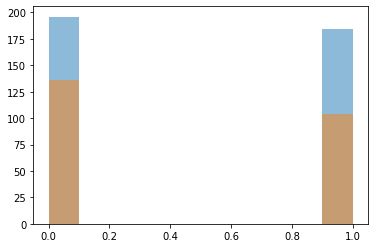

Target mean value for train set: 0.47
Target mean value for test set: 0.43


In [32]:
# plot class balance in the histogram
plt.hist(train_datasets[0]['FTR'], alpha=0.5)
plt.hist(test_dataset['FTR'], alpha=0.5)
plt.show()
print('Target mean value for train set:', overal_train_target_mean.round(2))
print('Target mean value for test set:', test_dataset['FTR'].mean().round(2))

Almost 50% in both case. Great!

### 1.2.12 Add win ratio of the home and away teams to the current time of the match
Expect: the higher the win rate, the higher the probability of the next win

In [33]:
train_datasets = [get_win_ratio(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,Difference1MatchPoints,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition,HomeTeamWinRatio,AwayTeamWinRatio
50,2000-09-16,Aston Villa,Bradford,2,0,1,12,8,7,4,...,2,4,3,3,5,7,8,-11.0,0.0,1.0
51,2000-09-16,Charlton,Tottenham,1,0,1,9,10,5,5,...,-2,-4,-5,-5,-17,8,7,8.0,0.5,0.5
52,2000-09-16,Everton,Man United,1,3,0,6,17,4,9,...,0,-3,-4,-4,-18,-1,3,12.0,0.5,0.0
53,2000-09-16,Leeds,Ipswich,1,2,0,11,12,6,7,...,0,-2,3,3,-3,5,13,-15.0,0.5,1.0
54,2000-09-16,Southampton,Newcastle,2,0,1,13,10,9,7,...,-1,-5,-7,-7,3,-1,14,4.0,0.0,0.5


In [34]:
test_datasets = get_win_ratio(test_dataset)
test_datasets.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,Difference1MatchPoints,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition,HomeTeamWinRatio,AwayTeamWinRatio
50,2019-09-20,Southampton,Bournemouth,1,3,0,25,6,6,3,...,0,4,0,0,2,-3,1,2.0,0.0,0.5
51,2019-09-21,Leicester,Tottenham,2,1,1,16,11,7,4,...,-3,2,0,0,-18,-11,2,5.0,0.5,0.0
52,2019-09-21,Burnley,Norwich,2,0,1,13,11,6,2,...,-2,-1,-1,-1,7,-8,9,0.0,0.5,1.0
53,2019-09-21,Everton,Sheffield United,0,2,0,16,2,3,1,...,0,2,2,2,7,2,-9,-10.0,1.0,0.0
54,2019-09-21,Man City,Watford,8,0,1,28,5,11,4,...,-1,4,8,8,17,20,11,-10.0,0.5,0.5


### 1.2.13 Add matchweek
Helper information, maybe useful in future

In [35]:
train_datasets = [get_match_week(dataset) for dataset in train_datasets] 
train_datasets[0].iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition,HomeTeamWinRatio,AwayTeamWinRatio,MatchWeek
50,2000-09-16,Aston Villa,Bradford,2,0,1,12,8,7,4,...,4,3,3,5,7,8,-11.0,0.0,1.0,6
51,2000-09-16,Charlton,Tottenham,1,0,1,9,10,5,5,...,-4,-5,-5,-17,8,7,8.0,0.5,0.5,6
52,2000-09-16,Everton,Man United,1,3,0,6,17,4,9,...,-3,-4,-4,-18,-1,3,12.0,0.5,0.0,6
53,2000-09-16,Leeds,Ipswich,1,2,0,11,12,6,7,...,-2,3,3,-3,5,13,-15.0,0.5,1.0,6
54,2000-09-16,Southampton,Newcastle,2,0,1,13,10,9,7,...,-5,-7,-7,3,-1,14,4.0,0.0,0.5,6


In [36]:
test_dataset = get_match_week(test_dataset, rounds=24) 
test_dataset.iloc[50:55]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition,HomeTeamWinRatio,AwayTeamWinRatio,MatchWeek
50,2019-09-20,Southampton,Bournemouth,1,3,0,25,6,6,3,...,4,0,0,2,-3,1,2.0,0.0,0.5,6
51,2019-09-21,Leicester,Tottenham,2,1,1,16,11,7,4,...,2,0,0,-18,-11,2,5.0,0.5,0.0,6
52,2019-09-21,Burnley,Norwich,2,0,1,13,11,6,2,...,-1,-1,-1,7,-8,9,0.0,0.5,1.0,6
53,2019-09-21,Everton,Sheffield United,0,2,0,16,2,3,1,...,2,2,2,7,2,-9,-10.0,1.0,0.0,6
54,2019-09-21,Man City,Watford,8,0,1,28,5,11,4,...,4,8,8,17,20,11,-10.0,0.5,0.5,6


### 1.2.14 Drop first 5 rounds from datasets 

In first rounds of season prediction match result will be like roulette. A lot of features make sense after several rounds(e.g win/loss streaks, differences in points in last matches)

In [37]:
train_datasets = [drop_first_rounds(dataset) for dataset in train_datasets] 
train_datasets[0].head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition,HomeTeamWinRatio,AwayTeamWinRatio,MatchWeek
50,2000-09-16,Aston Villa,Bradford,2,0,1,12,8,7,4,...,4,3,3,5,7,8,-11.0,0.0,1.0,6
51,2000-09-16,Charlton,Tottenham,1,0,1,9,10,5,5,...,-4,-5,-5,-17,8,7,8.0,0.5,0.5,6
52,2000-09-16,Everton,Man United,1,3,0,6,17,4,9,...,-3,-4,-4,-18,-1,3,12.0,0.5,0.0,6
53,2000-09-16,Leeds,Ipswich,1,2,0,11,12,6,7,...,-2,3,3,-3,5,13,-15.0,0.5,1.0,6
54,2000-09-16,Southampton,Newcastle,2,0,1,13,10,9,7,...,-5,-7,-7,3,-1,14,4.0,0.0,0.5,6


In [38]:
test_dataset = drop_first_rounds(test_dataset)
test_dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,Difference3MatchesPoints,Difference5MatchesPoints,Difference10MatchesPoints,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition,HomeTeamWinRatio,AwayTeamWinRatio,MatchWeek
50,2019-09-20,Southampton,Bournemouth,1,3,0,25,6,6,3,...,4,0,0,2,-3,1,2.0,0.0,0.5,6
51,2019-09-21,Leicester,Tottenham,2,1,1,16,11,7,4,...,2,0,0,-18,-11,2,5.0,0.5,0.0,6
52,2019-09-21,Burnley,Norwich,2,0,1,13,11,6,2,...,-1,-1,-1,7,-8,9,0.0,0.5,1.0,6
53,2019-09-21,Everton,Sheffield United,0,2,0,16,2,3,1,...,2,2,2,7,2,-9,-10.0,1.0,0.0,6
54,2019-09-21,Man City,Watford,8,0,1,28,5,11,4,...,4,8,8,17,20,11,-10.0,0.5,0.5,6


### 1.2.15 Select only useful features from datasets

Remove useless features

In [39]:
columns_to_use = [
                    'HomeTeam', 'AwayTeam', 'HomeTeamWinRatio', 'AwayTeamWinRatio',
                    'HomeTeamGoalsScored', 'AwayTeamGoalsScored', 'HomeTeamGoalsLost',
                    'AwayTeamGoalsLost', 'HomeTeamShootsMade', 'AwayTeamShootsMade',
                    'HomeTeamTargetShootsMade', 'AwayTeamTargetShootsMade',
                    'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamTotalPoints',
                    'AwayTeamTotalPoints', 'HomeTeamPointsFromLast1Matches',
                    'AwayTeamPointsFromLast1Matches', 'HomeTeamPointsFromLast3Matches',
                    'AwayTeamPointsFromLast3Matches', 'HomeTeamPointsFromLast5Matches',
                    'AwayTeamPointsFromLast5Matches', 'HomeTeamPointsFromLast10Matches',
                    'AwayTeamPointsFromLast10Matches', 'HomeTeamLast1Match',
                    'AwayTeamLast1Match', 'HomeTeamLast2Match', 'AwayTeamLast2Match',
                    'HomeTeamLast3Match', 'AwayTeamLast3Match', 'HomeTeamLast4Match',
                    'AwayTeamLast4Match', 'HomeTeamLast5Match', 'AwayTeamLast5Match',
                    'HomeTeamWinStreak3', 'HomeTeamWinStreak5',
                    'HomeTeamLossStreak3', 'HomeTeamLossStreak5', 'AwayTeamWinStreak3',
                    'AwayTeamWinStreak5', 'AwayTeamLossStreak3', 'AwayTeamLossStreak5',
                    'HomeTeamLastYearPosition', 'AwayTeamLastYearPosition',
                    'HomeTeamGoalsDifference', 'AwayTeamGoalsDifference',
                    'TotalGoalsDifference', 'DifferenceTotalPoints',
                    'Difference1MatchPoints', 'Difference3MatchesPoints',
                    'Difference5MatchesPoints', 'Difference10MatchesPoints',
                    'DifferenceInShoots', 'DifferenceInTargetShoots', 'DifferenceInCorners',
                    'DifferenceInLastYearPosition', 'IsHomeTeamRegulars', 'IsAwayTeamRegulars',
                    'IsHomeTeamRookie', 'IsAwayTeamRookie','MatchWeek','FTR'
                  ]

In [40]:
train_datasets = [select_columns(dataset, columns_to_use) for dataset in train_datasets] 
train_datasets[0].columns

Index(['HomeTeam', 'AwayTeam', 'HomeTeamWinRatio', 'AwayTeamWinRatio',
       'HomeTeamGoalsScored', 'AwayTeamGoalsScored', 'HomeTeamGoalsLost',
       'AwayTeamGoalsLost', 'HomeTeamShootsMade', 'AwayTeamShootsMade',
       'HomeTeamTargetShootsMade', 'AwayTeamTargetShootsMade',
       'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamTotalPoints',
       'AwayTeamTotalPoints', 'HomeTeamPointsFromLast1Matches',
       'AwayTeamPointsFromLast1Matches', 'HomeTeamPointsFromLast3Matches',
       'AwayTeamPointsFromLast3Matches', 'HomeTeamPointsFromLast5Matches',
       'AwayTeamPointsFromLast5Matches', 'HomeTeamPointsFromLast10Matches',
       'AwayTeamPointsFromLast10Matches', 'HomeTeamLast1Match',
       'AwayTeamLast1Match', 'HomeTeamLast2Match', 'AwayTeamLast2Match',
       'HomeTeamLast3Match', 'AwayTeamLast3Match', 'HomeTeamLast4Match',
       'AwayTeamLast4Match', 'HomeTeamLast5Match', 'AwayTeamLast5Match',
       'HomeTeamWinStreak3', 'HomeTeamWinStreak5', 'HomeTeamLossStreak3',
     

In [41]:
test_dataset = select_columns(test_dataset, columns_to_use)
test_dataset.columns

Index(['HomeTeam', 'AwayTeam', 'HomeTeamWinRatio', 'AwayTeamWinRatio',
       'HomeTeamGoalsScored', 'AwayTeamGoalsScored', 'HomeTeamGoalsLost',
       'AwayTeamGoalsLost', 'HomeTeamShootsMade', 'AwayTeamShootsMade',
       'HomeTeamTargetShootsMade', 'AwayTeamTargetShootsMade',
       'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamTotalPoints',
       'AwayTeamTotalPoints', 'HomeTeamPointsFromLast1Matches',
       'AwayTeamPointsFromLast1Matches', 'HomeTeamPointsFromLast3Matches',
       'AwayTeamPointsFromLast3Matches', 'HomeTeamPointsFromLast5Matches',
       'AwayTeamPointsFromLast5Matches', 'HomeTeamPointsFromLast10Matches',
       'AwayTeamPointsFromLast10Matches', 'HomeTeamLast1Match',
       'AwayTeamLast1Match', 'HomeTeamLast2Match', 'AwayTeamLast2Match',
       'HomeTeamLast3Match', 'AwayTeamLast3Match', 'HomeTeamLast4Match',
       'AwayTeamLast4Match', 'HomeTeamLast5Match', 'AwayTeamLast5Match',
       'HomeTeamWinStreak3', 'HomeTeamWinStreak5', 'HomeTeamLossStreak3',
     

## 1.3 Merge all seasons  from train set in one big dataframe

In [42]:
train_set = concat_datasets(train_datasets)     
train_set.head()  

,HomeTeam,AwayTeam,HomeTeamWinRatio,AwayTeamWinRatio,HomeTeamGoalsScored,AwayTeamGoalsScored,HomeTeamGoalsLost,AwayTeamGoalsLost,HomeTeamShootsMade,AwayTeamShootsMade,...,DifferenceInShoots,DifferenceInTargetShoots,DifferenceInCorners,DifferenceInLastYearPosition,IsHomeTeamRegulars,IsAwayTeamRegulars,IsHomeTeamRookie,IsAwayTeamRookie,MatchWeek,FTR
0,Aston Villa,Bradford,0.0,1.0,6,3,5,8,43,38,...,5,7,8,-11.0,0,0,0,0,6,1
1,Charlton,Tottenham,0.5,0.5,10,8,11,6,50,67,...,-17,8,7,8.0,0,1,1,0,6,1
2,Everton,Man United,0.5,0.0,9,14,8,3,60,78,...,-18,-1,3,12.0,1,1,0,0,6,0
3,Leeds,Ipswich,0.5,1.0,6,5,5,8,61,64,...,-3,5,13,-15.0,0,0,0,1,6,0
4,Southampton,Newcastle,0.0,0.5,7,7,9,4,59,56,...,3,-1,14,4.0,0,0,0,0,6,1


## 1.4 Save all preprocessed data

In [44]:
train_set.to_csv("./preprocessed_data/train_set_stage1.csv")
test_dataset.to_csv("./preprocessed_data/test_set_stage1.csv")